In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
 
 
 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(1)


2 Physical GPUs, 2 Logical GPUs


(50000, 32, 32, 3)
0.3529412
Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 1s 273us/sample - loss: 2.6264 - accuracy: 0.2160 - val_loss: 2.0255 - val_accuracy: 0.2780
Epoch 2/10
3000/3000 [==============================] - 1s 179us/sample - loss: 1.8527 - accuracy: 0.3510 - val_loss: 1.8718 - val_accuracy: 0.3320
Epoch 3/10
3000/3000 [==============================] - 1s 187us/sample - loss: 1.7530 - accuracy: 0.3657 - val_loss: 1.7928 - val_accuracy: 0.3720
Epoch 4/10
3000/3000 [==============================] - 1s 186us/sample - loss: 1.6483 - accuracy: 0.4257 - val_loss: 1.7658 - val_accuracy: 0.3680
Epoch 5/10
3000/3000 [==============================] - 1s 213us/sample - loss: 1.5723 - accuracy: 0.4430 - val_loss: 1.7038 - val_accuracy: 0.3900
Epoch 6/10
3000/3000 [==============================] - 1s 201us/sample - loss: 1.5210 - accuracy: 0.4703 - val_loss: 1.7132 - val_accuracy: 0.4010
Epoch 7/10
3000/3000 [=============

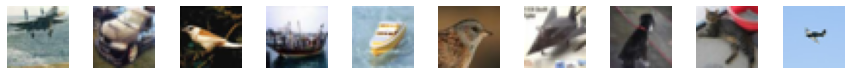

In [3]:
# ----- DataSet Import ------
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

NUM_CLASSES = 10
print(x_train.shape)

# ----- Feature PreProcessing ----

x_train = x_train[:3000].astype('float32') / 255.0
x_test = x_test[:1000].astype('float32') / 255.0

# ----- One hot encoding -------
y_train = to_categorical(y_train[:3000], NUM_CLASSES)
y_test = to_categorical(y_test[:1000], NUM_CLASSES)

print(x_train[54,12,12,1])

# Using Sequence
model = Sequential([
    Dense(200, activation = 'relu', input_shape=(32,32,3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# Funtional API
input_layer = Input(shape = (32,32,3))

x = Flatten()(input_layer)
x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)
output_layer = Dense(10, activation = 'softmax')(x)

api_model = Model(input_layer,output_layer)

# print(model.summary())
# print(api_model.summary())

optimizer = Adam(lr = 0.0005)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=64,epochs=10, shuffle=True,validation_data = (x_test,y_test))

classes = np.array(['airplain','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
preds = model.predict(x_test)
preds_single = classes[np.argmax(preds,axis=-1)]
actual_single = classes[np.argmax(y_test, axis=-1)]

import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show,i + 1)
    ax.axis('off')
    ax.imshow(img)


In [3]:

def CNN(input_shape=(32,32,3)):
    input_layer = Input(shape=input_shape)
    conv_layer1 = Conv2D(filters = 10, kernel_size=(4,4),strides=2, padding='same',activation='relu')(input_layer)
    conv_layer2 = Conv2D(filters = 20, kernel_size=(3,3),strides=2, padding='same',activation='relu')(conv_layer1)
    flatten = Flatten()(conv_layer2)
    output_layer = Dense(10, activation='softmax')(flatten)
    model = Model(input_layer,output_layer)
    return model


In [4]:
cnn_model = CNN()
print(cnn_model.summary())
cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
cnn_model.fit(x_train,y_train,batch_size=16,epochs=10,validation_data=(x_test,y_test))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________
None
Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 2s 674us/sam

In [8]:
#Using BatchNormalization, Dropout
from tensorflow.keras.layers import BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.layers import Conv2D
def RegulizationCNN(input_shape=(32,32,3)):
    input_layer = Input(shape=input_shape)
    x = Conv2D(filters=32, kernel_size = 3, strides = 1, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(filters=32, kernel_size = 3, strides = 2, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(filters=64, kernel_size = 3, strides = 1, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(filters=64, kernel_size = 3, strides = 1, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Flatten()(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.5)(x)

    x = Dense(10, activation = 'softmax')(x)
    model = Model(input_layer,x)

    return model



In [9]:
Reg_cnn = RegulizationCNN()
print(Reg_cnn.summary())
Reg_cnn.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
Reg_cnn.fit(x_train,y_train,batch_size=16,epochs=10,validation_data=(x_test,y_test))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8388736   
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512 

In [10]:
Reg_cnn.evaluate(x_test,y_test,batch_size=100)

[1.9408489108085631, 0.372]